In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
file_path = "../data/IMDB Dataset.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: Dataset file not found at {file_path}")
    print("Please make sure you have downloaded the 'IMDB Dataset.csv' and placed it in the 'data' folder.")

Dataset loaded successfully!


In [4]:
if 'df' in locals():
    print("\n--- First 5 Rows of the Data ---")
    print(df.head())


--- First 5 Rows of the Data ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
if 'df' in locals():
    print(f"\n--- Dataset Dimensions (Rows, Columns) ---")
    print(df.shape)


--- Dataset Dimensions (Rows, Columns) ---
(50000, 2)


In [6]:
if 'df' in locals():
    print("\n--- Missing Values Per Column ---")
    print(df.isnull().sum())


--- Missing Values Per Column ---
review       0
sentiment    0
dtype: int64


In [7]:
if 'df' in locals():
    print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 418


In [8]:
if 'df' in locals():
    print("\n--- Class Distribution (Sentiment) ---")
    print(df['sentiment'].value_counts())


--- Class Distribution (Sentiment) ---
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


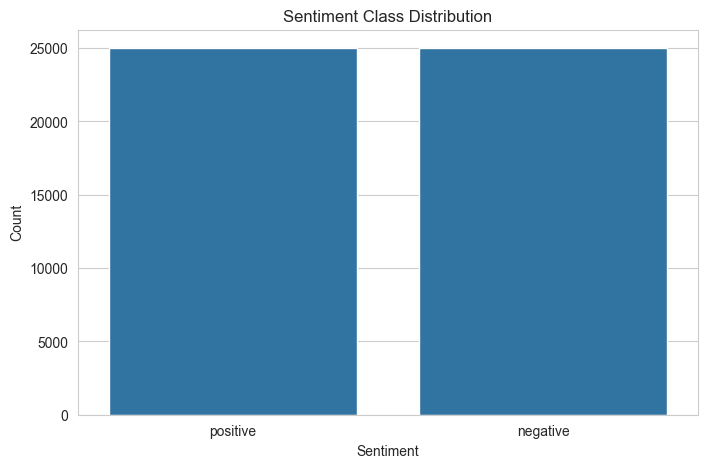

In [9]:
if 'df' in locals():
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sentiment', data=df)
    plt.title('Sentiment Class Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

In [10]:
if 'df' in locals():
    total = len(df)
    positive_pct = (df['sentiment'].value_counts()['positive'] / total) * 100
    negative_pct = (df['sentiment'].value_counts()['negative'] / total) * 100
    print(f"\nDataset is {positive_pct:.2f}% positive and {negative_pct:.2f}% negative.")


Dataset is 50.00% positive and 50.00% negative.


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('punkt')

print("NLTK modules downloaded.")

NLTK modules downloaded.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akkum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\akkum/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\akkum/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
stop_words = set(stopwords.words('english'))
print(f"Loaded {len(stop_words)} stopwords.")

Loaded 198 stopwords.


In [13]:
def to_lower(text):
    return text.lower()

def remove_html(text):
    return re.sub(r'<[^>]+>', ' ', text)

def remove_punctuation_and_numbers(text):
    return re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

In [14]:
print("Starting initial text cleaning...")
df['cleaned_review'] = df['review'].copy()

df['cleaned_review'] = df['cleaned_review'].apply(to_lower)

df['cleaned_review'] = df['cleaned_review'].apply(remove_html)

df['cleaned_review'] = df['cleaned_review'].apply(remove_punctuation_and_numbers)

print("Initial cleaning complete.")

print("\n--- Cleaning Comparison ---")
print("Original Review:\n", df['review'].iloc[5])
print("\nCleaned Review:\n", df['cleaned_review'].iloc[5])

Starting initial text cleaning...
Initial cleaning complete.

--- Cleaning Comparison ---
Original Review:
 Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.

Cleaned Review:
 probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some  or more times in the last  year

In [15]:
def tokenize_and_remove_stopwords(text):
    if pd.isna(text) or text == '':
        return []
    
    text = str(text)
    
    try:
        tokens = word_tokenize(text)
    except:
        tokens = text.split()
    
    clean_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    return clean_tokens

In [16]:
print("Tokenizing and removing stopwords...")
df['tokens'] = df['cleaned_review'].apply(tokenize_and_remove_stopwords)

print("Tokenization complete.")

print("\n--- Tokenization Example ---")
print("Cleaned Review:\n", df['cleaned_review'].iloc[5])
print("\nTokens:\n", df['tokens'].iloc[5])

Tokenizing and removing stopwords...
Tokenization complete.

--- Tokenization Example ---
Cleaned Review:
 probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some  or more times in the last  years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie

Tokens:
 ['probably', 'alltime', 'favorite', 'movie', 'story', 'selflessness', 'sacrifice', 'dedication', 'noble', 'cause', 'preachy', 'boring', 'never', 'gets', 'old', 'despite', 'seen', 'times', 'last', 'years', 'paul', 'lukas', 'performance', 'brings', 'tears', 'e

In [17]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

print("Lemmatizing tokens...")

df['tokens_lemmatized'] = df['tokens'].apply(lemmatize_tokens)

print("Lemmatization complete.")


Lemmatizing tokens...
Lemmatization complete.


In [18]:
print("\n--- Lemmatization Example ---")
print("Original Tokens:\n", df['tokens'].iloc[5])
print("\nLemmatized Tokens:\n", df['tokens_lemmatized'].iloc[5])


--- Lemmatization Example ---
Original Tokens:
 ['probably', 'alltime', 'favorite', 'movie', 'story', 'selflessness', 'sacrifice', 'dedication', 'noble', 'cause', 'preachy', 'boring', 'never', 'gets', 'old', 'despite', 'seen', 'times', 'last', 'years', 'paul', 'lukas', 'performance', 'brings', 'tears', 'eyes', 'bette', 'davis', 'one', 'truly', 'sympathetic', 'roles', 'delight', 'kids', 'grandma', 'says', 'like', 'dressedup', 'midgets', 'children', 'makes', 'fun', 'watch', 'mothers', 'slow', 'awakening', 'whats', 'happening', 'world', 'roof', 'believable', 'startling', 'dozen', 'thumbs', 'theyd', 'movie']

Lemmatized Tokens:
 ['probably', 'alltime', 'favorite', 'movie', 'story', 'selflessness', 'sacrifice', 'dedication', 'noble', 'cause', 'preachy', 'boring', 'never', 'get', 'old', 'despite', 'seen', 'time', 'last', 'year', 'paul', 'lukas', 'performance', 'brings', 'tear', 'eye', 'bette', 'davis', 'one', 'truly', 'sympathetic', 'role', 'delight', 'kid', 'grandma', 'say', 'like', 'dress

In [19]:
def join_tokens(tokens):
    return ' '.join(tokens)

print("Rejoining tokens into final processed string...")

df['final_processed_review'] = df['tokens_lemmatized'].apply(join_tokens)

print("All text processing is complete.")

Rejoining tokens into final processed string...
All text processing is complete.


In [20]:
print("\n--- END-TO-END PROCESSING EXAMPLE ---")
print("Original Review:\n", df['review'].iloc[5])
print("\nFinal Processed Review:\n", df['final_processed_review'].iloc[5])

df_processed = df[['final_processed_review', 'sentiment']].copy()


--- END-TO-END PROCESSING EXAMPLE ---
Original Review:
 Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.

Final Processed Review:
 probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy boring never get old despite seen time last year paul lukas performance brings tear eye bette davis one truly sympathetic role delight kid grandma say like dressedup mi

In [21]:
from sklearn.preprocessing import LabelEncoder

X = df['final_processed_review']

y = df['sentiment']

In [22]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print("X (features) and y (target) are defined.")
print(f"First 5 X entries:\n{X.head()}")
print(f"\nFirst 5 y entries (now encoded):\n{y[:5]}")
print(f"\nData shapes: X: {X.shape}, y: {y.shape}")

X (features) and y (target) are defined.
First 5 X entries:
0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: final_processed_review, dtype: object

First 5 y entries (now encoded):
[1 1 1 0 1]

Data shapes: X: (50000,), y: (50000,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Data successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}  |  y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}   |  y_test shape:  {y_test.shape}")

Data successfully split into training and testing sets.
X_train shape: (40000,)  |  y_train shape: (40000,)
X_test shape:  (10000,)   |  y_test shape:  (10000,)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1, 2))

print("TF-IDF Vectorizer instantiated.")

print("Fitting vectorizer and transforming X_train...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

print("Transforming X_test...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Vectorization complete.")

TF-IDF Vectorizer instantiated.
Fitting vectorizer and transforming X_train...
Transforming X_test...
Vectorization complete.


In [25]:
print("\n--- TF-IDF Matrix Shapes ---")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape:  {X_test_tfidf.shape}")

print("\nExplanation:")
print(f"We have {X_train_tfidf.shape[0]} documents (reviews) in the training set.")
print(f"We have {X_test_tfidf.shape[0]} documents (reviews) in the testing set.")
print(f"Both sets have {X_train_tfidf.shape[1]} features (words), which matches our 'max_features=5000' setting.")


--- TF-IDF Matrix Shapes ---
X_train_tfidf shape: (40000, 5000)
X_test_tfidf shape:  (10000, 5000)

Explanation:
We have 40000 documents (reviews) in the training set.
We have 10000 documents (reviews) in the testing set.
Both sets have 5000 features (words), which matches our 'max_features=5000' setting.


In [26]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

import joblib

import seaborn as sns
import matplotlib.pyplot as plt

import os


In [27]:
baseline_model = LogisticRegression(max_iter=1000)

print("Training the Logistic Regression model...")

baseline_model.fit(X_train_tfidf, y_train)

print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


In [28]:
y_pred = baseline_model.predict(X_test_tfidf)

print("Predictions made on the test set.")

report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

print("\n--- Classification Report ---")
print(report)

Predictions made on the test set.

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      5000
    Positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



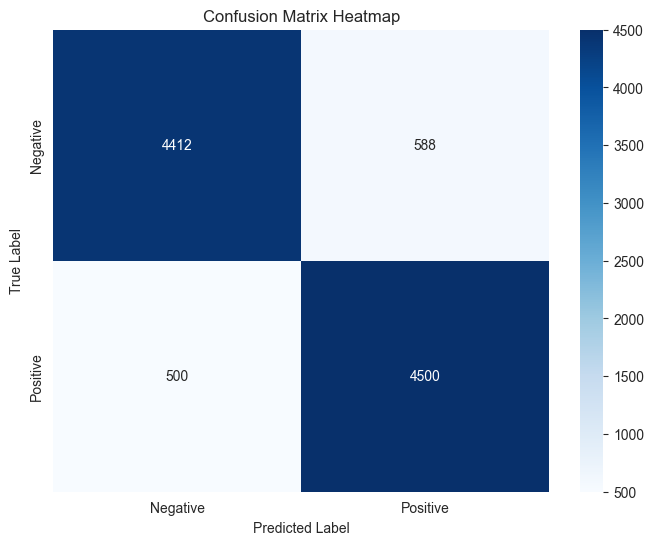

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [30]:
model_dir = "../models"
model_path = os.path.join(model_dir, "sentiment_model_lr.joblib")
vectorizer_path = os.path.join(model_dir, "tfidf_vectorizer.joblib")

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created directory: {model_dir}")

joblib.dump(baseline_model, model_path)
print(f"Trained model saved to: {model_path}")

joblib.dump(tfidf_vectorizer, vectorizer_path)
print(f"Fitted TF-IDF vectorizer saved to: {vectorizer_path}")

print("\nBaseline model and vectorizer are now saved and ready for deployment.")

Trained model saved to: ../models\sentiment_model_lr.joblib
Fitted TF-IDF vectorizer saved to: ../models\tfidf_vectorizer.joblib

Baseline model and vectorizer are now saved and ready for deployment.
